# API

In [25]:
import requests
import json

In [26]:
import pandas as pd

## Calling the API

In [3]:
api_url = 'https://api.exchangeratesapi.io/latest'
response = requests.get(api_url)
rates = json.loads(response.text)
print(rates)

{'rates': {'CAD': 1.5486, 'HKD': 8.9676, 'ISK': 157.8, 'PHP': 57.202, 'DKK': 7.4429, 'HUF': 347.31, 'CZK': 26.342, 'AUD': 1.6246, 'RON': 4.8355, 'SEK': 10.264, 'IDR': 16948.0, 'INR': 86.577, 'BRL': 5.9524, 'RUB': 82.5723, 'HRK': 7.5215, 'JPY': 123.98, 'THB': 36.685, 'CHF': 1.0731, 'SGD': 1.6033, 'PLN': 4.4141, 'BGN': 1.9558, 'TRY': 7.9229, 'CNY': 8.1057, 'NOK': 10.6073, 'NZD': 1.7384, 'ZAR': 19.2203, 'USD': 1.1569, 'MXN': 25.9685, 'ILS': 3.956, 'GBP': 0.91195, 'KRW': 1389.31, 'MYR': 4.9267}, 'base': 'EUR', 'date': '2020-07-23'}


## Convert to dataframe

In [24]:
rates_df = pd.DataFrame(response.json())
rates_df.head()

,rates,base,date
AUD,1.6376,EUR,2020-07-24
BGN,1.9558,EUR,2020-07-24
BRL,6.0777,EUR,2020-07-24
CAD,1.5578,EUR,2020-07-24
CHF,1.0730,EUR,2020-07-24


## Build a function that gets the rates for today

In [27]:
def get_rates():
    api_url = 'https://api.exchangeratesapi.io/latest'
    response = requests.get(api_url)
    return response.json()['rates']

In [28]:
get_rates()

{'CAD': 1.5578,
 'HKD': 8.9978,
 'ISK': 157.8,
 'PHP': 57.316,
 'DKK': 7.4438,
 'HUF': 346.98,
 'CZK': 26.268,
 'AUD': 1.6376,
 'RON': 4.8325,
 'SEK': 10.269,
 'IDR': 16982.0,
 'INR': 86.866,
 'BRL': 6.0777,
 'RUB': 83.3938,
 'HRK': 7.517,
 'JPY': 123.36,
 'THB': 36.821,
 'CHF': 1.073,
 'SGD': 1.6083,
 'PLN': 4.4046,
 'BGN': 1.9558,
 'TRY': 7.9496,
 'CNY': 8.1453,
 'NOK': 10.6953,
 'NZD': 1.7506,
 'ZAR': 19.435,
 'USD': 1.1608,
 'MXN': 26.0804,
 'ILS': 3.9642,
 'GBP': 0.90985,
 'KRW': 1396.83,
 'MYR': 4.9502}

## Build a function that gets the conversion from one currendy to another

In [29]:
def convert(cantidad, de='EUR', a='USD'):
    rates = get_rates()
    rates['EUR'] = 1
    return rates[a] / rates[de] * cantidad

In [30]:
convert(100,'EUR', 'GBP')

90.985

## Test the results

In [31]:
cantidad_en_euros = 100
cantidad_en_dolares = convert(cantidad_en_euros)

print(f'{cantidad_en_euros} euros son {cantidad_en_dolares:.2f} dólares')

cantidad_en_dolares = convert(cantidad_en_euros, de='CAD', a='USD')
print(f'{cantidad_en_euros} dolares canadiendes son {cantidad_en_dolares:.2f} dólares estadounidenses')

100 euros son 116.08 dólares
100 dolares canadiendes son 74.52 dólares estadounidenses


## Headers

In [56]:
browsers =['Mozilla/5.0 (X11; U; Linux i686; en-US; rv:1.9a1) Gecko/20070308 Minefield/3.0a1',
'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/601.7.7 (KHTML, like Gecko) Version/9.1.2 Safari/601.7.7',
'Mozilla/5.0 (Linux; Android 5.0; SAMSUNG SM-G900F Build/LRX21T) AppleWebKit/537.36 (KHTML, like Gecko) SamsungBrowser/2.1 Chrome/34.0.1847.76 Mobile Safari/537.36']

import random
headers = {'User-Agent': random.choice(browsers)}

In [52]:
random.choice(browsers)

'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/601.7.7 (KHTML, like Gecko) Version/9.1.2 Safari/601.7.7'

In [19]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'}


In [54]:
api_url = 'https://api.exchangeratesapi.io/latest'
response = requests.get(api_url, headers=headers)

In [55]:
response.text

'{"rates":{"CAD":1.5578,"HKD":8.9978,"ISK":157.8,"PHP":57.316,"DKK":7.4438,"HUF":346.98,"CZK":26.268,"AUD":1.6376,"RON":4.8325,"SEK":10.269,"IDR":16982.0,"INR":86.866,"BRL":6.0777,"RUB":83.3938,"HRK":7.517,"JPY":123.36,"THB":36.821,"CHF":1.073,"SGD":1.6083,"PLN":4.4046,"BGN":1.9558,"TRY":7.9496,"CNY":8.1453,"NOK":10.6953,"NZD":1.7506,"ZAR":19.435,"USD":1.1608,"MXN":26.0804,"ILS":3.9642,"GBP":0.90985,"KRW":1396.83,"MYR":4.9502},"base":"EUR","date":"2020-07-24"}'

In [45]:
query={'base':'USD','symbols':'GBP','start_at':'2020-07-20','end_at':'2020-07-24'}

In [46]:
api_url = 'https://api.exchangeratesapi.io/history'
response = requests.get(api_url, headers=headers, params=query)

In [47]:
response.json()

{'rates': {'2020-07-24': {'GBP': 0.7838128877},
  '2020-07-20': {'GBP': 0.7911862334},
  '2020-07-23': {'GBP': 0.7882703777},
  '2020-07-21': {'GBP': 0.7869876781},
  '2020-07-22': {'GBP': 0.7870357575}},
 'start_at': '2020-07-20',
 'base': 'USD',
 'end_at': '2020-07-24'}

In [48]:
response.url

'https://api.exchangeratesapi.io/history?base=USD&symbols=GBP&start_at=2020-07-20&end_at=2020-07-24'

## API wrapper

In [58]:
get_rates().keys()

dict_keys(['CAD', 'HKD', 'ISK', 'PHP', 'DKK', 'HUF', 'CZK', 'AUD', 'RON', 'SEK', 'IDR', 'INR', 'BRL', 'RUB', 'HRK', 'JPY', 'THB', 'CHF', 'SGD', 'PLN', 'BGN', 'TRY', 'CNY', 'NOK', 'NZD', 'ZAR', 'USD', 'MXN', 'ILS', 'GBP', 'KRW', 'MYR'])

In [65]:
from datetime import datetime, timedelta

In [63]:
datetime.strftime(datetime.today(),'%Y-%m-%d')

'2020-07-25'

In [91]:
exchangeratesapi(base='USD')

{'rates': {'2020-07-24': {'CAD': 1.3420055134,
   'HKD': 7.7513783598,
   'ISK': 135.9407305307,
   'PHP': 49.3762922123,
   'DKK': 6.4126464507,
   'HUF': 298.9145416954,
   'CZK': 22.6292212267,
   'GBP': 0.7838128877,
   'RON': 4.1630771881,
   'SEK': 8.8464851826,
   'IDR': 14629.5658166782,
   'INR': 74.8328738801,
   'BRL': 5.2357856651,
   'RUB': 71.8416609235,
   'HRK': 6.4757064094,
   'JPY': 106.2715368711,
   'THB': 31.7203652653,
   'CHF': 0.9243625086,
   'MYR': 4.2644727774,
   'BGN': 1.6848725017,
   'TRY': 6.8483804273,
   'CNY': 7.0169710544,
   'NOK': 9.213731909,
   'NZD': 1.5080978635,
   'ZAR': 16.7427636113,
   'USD': 1.0,
   'MXN': 22.4676085458,
   'SGD': 1.3855099931,
   'AUD': 1.4107512061,
   'ILS': 3.4150585803,
   'KRW': 1203.3339076499,
   'PLN': 3.794452102}},
 'start_at': '2020-07-24',
 'base': 'USD',
 'end_at': '2020-07-24'}

In [140]:
today = datetime.today()
yesterday = datetime.today() - timedelta(days=1)
last_week = yesterday - timedelta(weeks=1)
last_year = today.replace(year=today.year-1)
datetime.strftime(yesterday,'%Y-%m-%d')

'2020-07-24'

## 1.- Evolución gráfica de la cotización del Euro respecto al dolar en lo que va de año

In [166]:
def exchangeratesapi(base, symbols, start_at, end_at):
    
    api_url = 'https://api.exchangeratesapi.io/history'
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'}
    query={'base':base,'symbols': symbols,'start_at':start_at,'end_at':end_at}
    response = requests.get(api_url, headers=headers, params=query)
    return response.json()['rates']

In [168]:
get_rates().keys()

dict_keys(['CAD', 'HKD', 'ISK', 'PHP', 'DKK', 'HUF', 'CZK', 'AUD', 'RON', 'SEK', 'IDR', 'INR', 'BRL', 'RUB', 'HRK', 'JPY', 'THB', 'CHF', 'SGD', 'PLN', 'BGN', 'TRY', 'CNY', 'NOK', 'NZD', 'ZAR', 'USD', 'MXN', 'ILS', 'GBP', 'KRW', 'MYR'])

In [170]:
def exchangeratesapi(base='EUR', symbols=get_rates().keys(), start_at=datetime.strftime(datetime.today() - timedelta(days=1),'%Y-%m-%d'), end_at=datetime.strftime(datetime.today() - timedelta(days=1),'%Y-%m-%d')):
    
    api_url = 'https://api.exchangeratesapi.io/history'
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'}
    query={'base':base,'symbols': symbols,'start_at':start_at,'end_at':end_at}
    response = requests.get(api_url, headers=headers, params=query)
    return response.json()['rates']

In [173]:
res = exchangeratesapi(base='USD', symbols='EUR', start_at='2020-01-01', end_at=yesterday)

In [175]:
df = pd.DataFrame(res)
df

,2020-02-11,2020-01-09,2020-03-09,2020-01-03,2020-02-19,2020-03-27,2020-05-13,2020-04-07,2020-06-18,2020-05-19,...,2020-07-23,2020-07-08,2020-06-08,2020-01-02,2020-07-07,2020-04-06,2020-02-21,2020-05-28,2020-04-29,2020-04-08
EUR,0.917347,0.90009,0.872905,0.897102,0.925926,0.910996,0.91954,0.918695,0.891107,0.913242,...,0.864379,0.886054,0.886132,0.893416,0.88574,0.926698,0.92584,0.907771,0.922339,0.919879


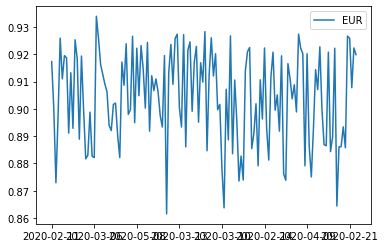

In [176]:
df.T.plot()

In [112]:
evolution = pd.melt(df.reset_index(), id_vars='index', var_name='fecha', value_name='rate')

In [177]:
evolution

,index,fecha,rate
0,EUR,2020-02-11,0.917347
1,EUR,2020-01-09,0.900090
2,EUR,2020-03-09,0.872905
3,EUR,2020-01-03,0.897102
4,EUR,2020-02-19,0.925926
...,...,...,...
139,EUR,2020-04-06,0.926698
140,EUR,2020-02-21,0.925840
141,EUR,2020-05-28,0.907771
142,EUR,2020-04-29,0.922339


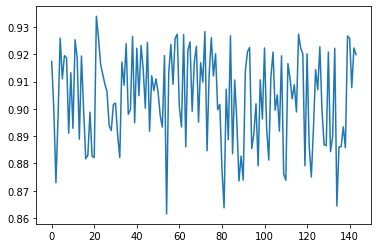

In [113]:
evolution['rate'].plot()

## 2.- Crear un dataframe con las distintas monedas y una columna que nos diga si sube o baja respecto al dia/semana/año anterior

In [178]:
today = datetime.today()
yesterday = datetime.today() - timedelta(days=1)
day_before = datetime.today() - timedelta(days=2)
last_week = yesterday - timedelta(weeks=1)
last_year = today.replace(year=today.year-1)

today = datetime.strftime(today,'%Y-%m-%d')
yesterday = datetime.strftime(yesterday,'%Y-%m-%d')
day_before = datetime.strftime(day_before,'%Y-%m-%d')
last_week = datetime.strftime(last_week,'%Y-%m-%d')
last_year = datetime.strftime(last_year,'%Y-%m-%d')

In [179]:
pd.DataFrame(exchangeratesapi(start_at=yesterday, end_at=yesterday ))

,2020-07-24
AUD,1.63760
BGN,1.95580
BRL,6.07770
CAD,1.55780
CHF,1.07300
CNY,8.14530
CZK,26.26800
DKK,7.44380
GBP,0.90985
HKD,8.99780


In [180]:
pd.DataFrame(exchangeratesapi(start_at=day_before, end_at=day_before ))

,2020-07-23
AUD,1.62460
BGN,1.95580
BRL,5.95240
CAD,1.54860
CHF,1.07310
CNY,8.10570
CZK,26.34200
DKK,7.44290
GBP,0.91195
HKD,8.96760


In [182]:
pd.DataFrame(exchangeratesapi(start_at=last_week, end_at=last_week ))

,2020-07-17
AUD,1.63600
BGN,1.95580
BRL,6.08390
CAD,1.55100
CHF,1.07530
CNY,7.99750
CZK,26.68200
DKK,7.44530
GBP,0.91078
HKD,8.86170


In [181]:
pd.DataFrame(exchangeratesapi(start_at=last_year, end_at=last_year ))

,2019-07-25
AUD,1.59430
BGN,1.95580
BRL,4.17710
CAD,1.45910
CHF,1.09890
CNY,7.63930
CZK,25.51900
DKK,7.46480
GBP,0.88963
HKD,8.68510


In [183]:
df = pd.concat([pd.DataFrame(exchangeratesapi(start_at=yesterday, end_at=yesterday )),
         pd.DataFrame(exchangeratesapi(start_at=day_before, end_at=day_before )),
         pd.DataFrame(exchangeratesapi(start_at=last_week, end_at=last_week )),
         pd.DataFrame(exchangeratesapi(start_at=last_year, end_at=last_year ))], axis=1)

In [184]:
df

,2020-07-24,2020-07-23,2020-07-17,2019-07-25
AUD,1.63760,1.62460,1.63600,1.59430
BGN,1.95580,1.95580,1.95580,1.95580
BRL,6.07770,5.95240,6.08390,4.17710
CAD,1.55780,1.54860,1.55100,1.45910
CHF,1.07300,1.07310,1.07530,1.09890
CNY,8.14530,8.10570,7.99750,7.63930
CZK,26.26800,26.34200,26.68200,25.51900
DKK,7.44380,7.44290,7.44530,7.46480
GBP,0.90985,0.91195,0.91078,0.88963
HKD,8.99780,8.96760,8.86170,8.68510


In [188]:
df.iloc[:,0]>df.iloc[:,3]

AUD     True
BGN    False
BRL     True
CAD     True
CHF    False
CNY     True
CZK     True
DKK    False
GBP     True
HKD     True
HRK     True
HUF     True
IDR     True
ILS     True
INR     True
ISK     True
JPY     True
KRW     True
MXN     True
MYR     True
NOK     True
NZD     True
PHP     True
PLN     True
RON     True
RUB     True
SEK    False
SGD     True
THB     True
TRY     True
USD     True
ZAR     True
dtype: bool

In [156]:
import numpy as np

In [189]:
df['yesterday'] = np.where(df.iloc[:,0]>df.iloc[:,1], 'sube', 'baja')

In [190]:
df['last_week'] = np.where(df.iloc[:,0]>df.iloc[:,2], 'sube', 'baja')

In [191]:
df['last_year'] = np.where(df.iloc[:,0]>df.iloc[:,2], 'sube', 'baja')

In [192]:
df

,2020-07-24,2020-07-23,2020-07-17,2019-07-25,yesterday,last_week,last_year
AUD,1.63760,1.62460,1.63600,1.59430,sube,sube,sube
BGN,1.95580,1.95580,1.95580,1.95580,baja,baja,baja
BRL,6.07770,5.95240,6.08390,4.17710,sube,baja,baja
CAD,1.55780,1.54860,1.55100,1.45910,sube,sube,sube
CHF,1.07300,1.07310,1.07530,1.09890,baja,baja,baja
CNY,8.14530,8.10570,7.99750,7.63930,sube,sube,sube
CZK,26.26800,26.34200,26.68200,25.51900,baja,baja,baja
DKK,7.44380,7.44290,7.44530,7.46480,sube,baja,baja
GBP,0.90985,0.91195,0.91078,0.88963,baja,baja,baja
HKD,8.99780,8.96760,8.86170,8.68510,sube,sube,sube
